# Optimizing the 3 functions for the gridworld with Optuna
- Monte Carlo Evaluation  
- SARSA  
- Q-Learning

In [1]:
from task_1 import *

from gridworld import *
from plot import *

import numpy as np
import matplotlib.pyplot as plt

import optuna

/Users/andrekestler/opt/anaconda3/envs/AI/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
random.seed(8)
np.random.seed(8)

# Monte Carlo Evaluation

In [3]:
# optimize hyperparameters of MC evaluation function:
def objective(trial):
    np.random.seed(8)
    random.seed(8)

    env = Random(size=12, water=0.3, mountain=0.0)

    # hyperparameters to optimize
    max_steps = 1000    # We want to optimize the max_episodes, not the max_steps
    epsilon = 0.8       # Due to the fact that we are using a decaying epsilon, we do not optimize this hyperparameter

    max_episodes = trial.suggest_int("max_episodes", 100, 1000)
    gamma = trial.suggest_float("gamma", 0.1, 0.9, step=0.1)
    alpha = trial.suggest_float("alpha", 0.1, 0.9, step=0.1)
    initialization = trial.suggest_int("initialization", 0, 100)
    decay_rate = trial.suggest_float("decay_rate", 0.25, 1.0, step=0.25)
    decay_interval = trial.suggest_int("decay_interval", 10, 100, step=10)

    # run sarsa function with hyperparameters
    lst_rewards = []
    for i in range(10):
        Q, policy, cummulative_rewards = monteCarlo_evaluation(env, max_episodes, max_steps, gamma, alpha, epsilon, initialization, decay_rate=decay_rate, decay_interval=decay_interval)
        lst_rewards.append(cummulative_rewards[-1])
    
    return cummulative_rewards[-1]

# optimize hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10000)


[I 2023-11-14 12:34:44,205] A new study created in memory with name: no-name-cbca33a1-f546-407f-8110-2055877a954b


[I 2023-11-14 12:34:45,039] Trial 0 finished with value: 100.0 and parameters: {'max_episodes': 967, 'gamma': 0.5, 'alpha': 0.30000000000000004, 'initialization': 64, 'decay_rate': 0.25, 'decay_interval': 80}. Best is trial 0 with value: 100.0.
[I 2023-11-14 12:34:48,670] Trial 1 finished with value: 0.0 and parameters: {'max_episodes': 627, 'gamma': 0.9, 'alpha': 0.2, 'initialization': 66, 'decay_rate': 1.0, 'decay_interval': 60}. Best is trial 0 with value: 100.0.
[I 2023-11-14 12:34:48,698] Trial 2 finished with value: -100.0 and parameters: {'max_episodes': 109, 'gamma': 0.4, 'alpha': 0.4, 'initialization': 99, 'decay_rate': 0.25, 'decay_interval': 90}. Best is trial 0 with value: 100.0.
[I 2023-11-14 12:34:51,865] Trial 3 finished with value: -100.0 and parameters: {'max_episodes': 595, 'gamma': 0.1, 'alpha': 0.4, 'initialization': 28, 'decay_rate': 0.5, 'decay_interval': 90}. Best is trial 0 with value: 100.0.
[I 2023-11-14 12:34:55,279] Trial 4 finished with value: 0.0 and param

### Best parameter from Optuna
With this parameter my agent does not reach the goal state in every run

In [4]:
# Print best parameter with lowest max_episodes
df = study.trials_dataframe()
df = df[df["value"] == 100]
best_param = df[df["params_max_episodes"] == df["params_max_episodes"].min()]
best_param

number  value             datetime_start          datetime_complete  \
1299    1299  100.0 2023-11-14 12:51:18.967355 2023-11-14 12:51:19.130272   
4200    4200  100.0 2023-11-14 13:29:40.420893 2023-11-14 13:29:40.797487   
8916    8916  100.0 2023-11-14 15:00:03.906286 2023-11-14 15:00:04.640698   

                   duration  params_alpha  params_decay_interval  \
1299 0 days 00:00:00.162917           0.3                     30   
4200 0 days 00:00:00.376594           0.1                     10   
8916 0 days 00:00:00.734412           0.2                     40   

      params_decay_rate  params_gamma  params_initialization  \
1299               0.25           0.4                     47   
4200               0.25           0.6                     25   
8916               0.25           0.4                     42   

      params_max_episodes     state  
1299                  100  COMPLETE  
4200                  100  COMPLETE  
8916                  100  COMPLETE

In [5]:
# Get best parameter from Optuna
MAX_STEPS = 1000
EPSILON = 0.8

MAX_EPISODES = best_param["params_max_episodes"].values[0]
GAMMA = best_param["params_gamma"].values[0]
ALPHA = best_param["params_alpha"].values[0]
INITIALIZATION = best_param["params_initialization"].values[0]
DECAY_RATE = best_param["params_decay_rate"].values[0]
DECAY_INTERVAL = best_param["params_decay_interval"].values[0]

print("MAX_EPISODES: ", MAX_EPISODES)
print("MAX_STEPS: ", MAX_STEPS)
print("GAMMA: ", GAMMA)
print("ALPHA: ", ALPHA)
print("EPSILON: ", EPSILON)
print("INITIALIZATION: ", INITIALIZATION)
print("DECAY_RATE: ", DECAY_RATE)
print("DECAY_INTERVAL: ", DECAY_INTERVAL)


MAX_EPISODES:  100
MAX_STEPS:  1000
GAMMA:  0.4
ALPHA:  0.30000000000000004
EPSILON:  0.8
INITIALIZATION:  47
DECAY_RATE:  0.25
DECAY_INTERVAL:  30


### Best Parameter after tweaking it manually after Optuna optimization
I did the manual tweak that every run reaches the goal state  
I just increased MAX_EPISODES from 100 to a high value (800) and I saw i the plot that it converged aroudn 250 episodes so I took MAX_EPISODES=250  
<br>
MAX_EPISODES = 250
MAX_STEPS = 1000  
EPSILON = 0.8  
GAMMA = 0.7000000000000001  
ALPHA = 0.7000000000000001  
INITIALIZATION = 32  
DECAY_RATE = 2.25  
DECAY_INTERVAL = 61

In [3]:
# Best parameter after tweaking the hyperparameters manually after Optuna that every run leads to a goal state
MAX_EPISODES = 250
MAX_STEPS = 1000
EPSILON = 0.8
GAMMA = 0.8
ALPHA = 0.1
INITIALIZATION = 47
DECAY_RATE = 0.25
DECAY_INTERVAL = 30

### Run Environment with parameters 10 times

Monte Carlo Evaluation: Goal state is reachable with [0, 1, 2, 3, 4, 5, 6, 8] policies



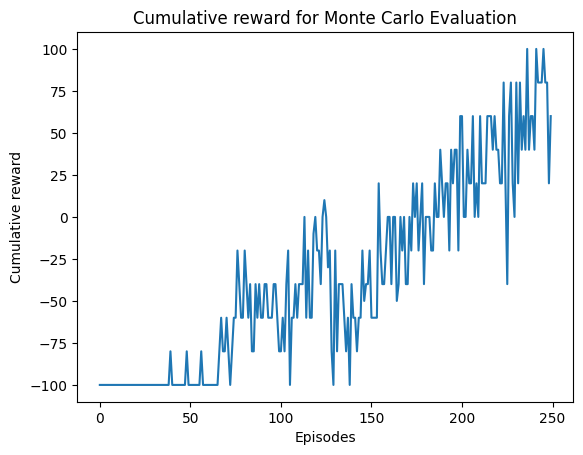

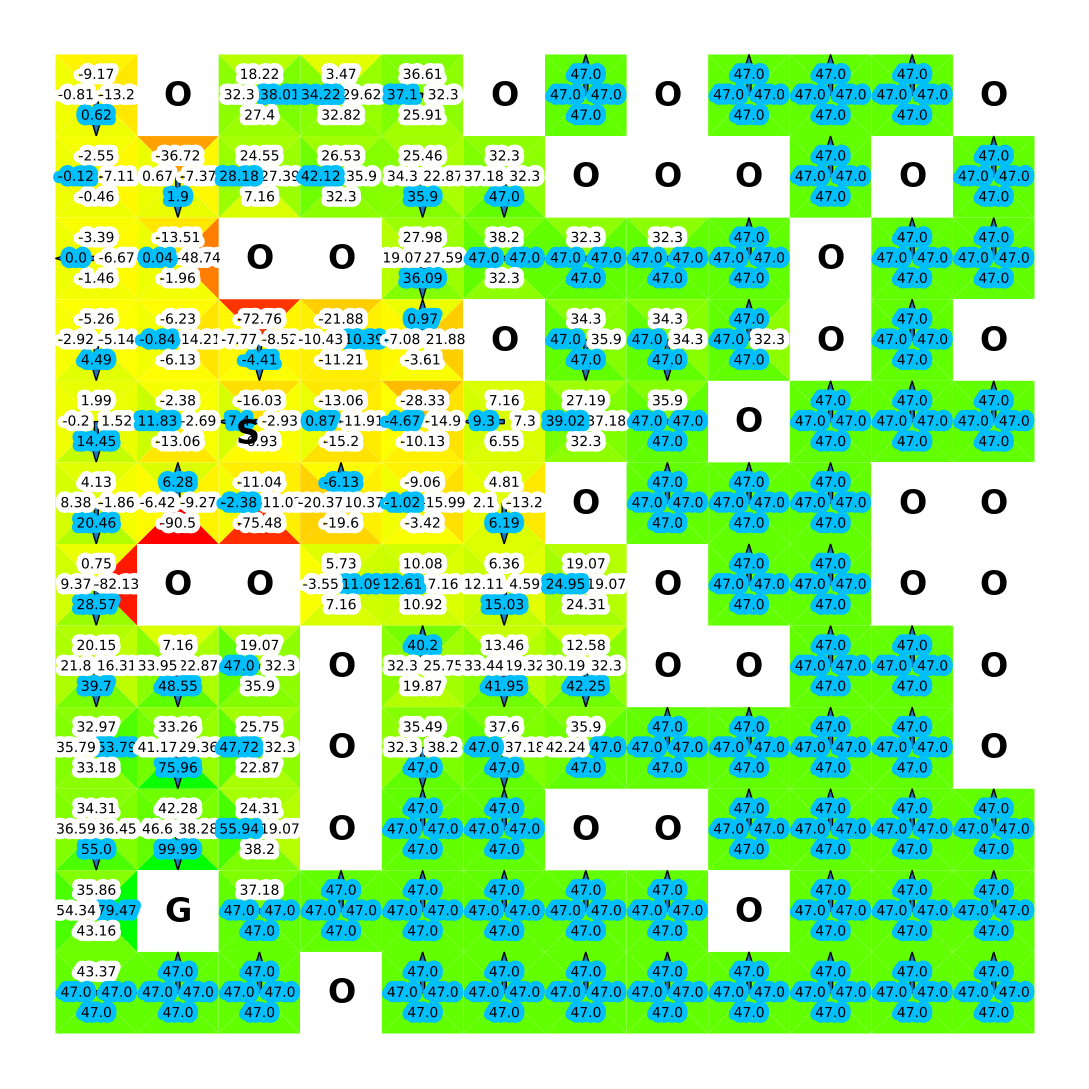

In [4]:
np.random.seed(8)
random.seed(8)

env = Random(size=12, water=0.3, mountain=0.0)

lst_Q_table = []
lst_policy = []
lst_reward = []
for i in range(10):
    Q_table, policy, reward = monteCarlo_evaluation(env, max_episodes=MAX_EPISODES, max_steps=MAX_STEPS, gamma=GAMMA, alpha=ALPHA, epsilon=EPSILON, initialisation=INITIALIZATION, decay_rate=DECAY_RATE, decay_interval=DECAY_INTERVAL)
    lst_Q_table.append(Q_table)
    lst_policy.append(policy)
    lst_reward.append(reward)

# Check if the goal state is reachable with the every policy
index = check_goal_reachable_all_policies(env, lst_policy, "Monte Carlo Evaluation")

# Plot the cummulative reward
plot_cummulative_reward(lst_reward, title="Monte Carlo Evaluation")

# Example Q-table plot
plot_q_table(env, lst_Q_table[index], lst_policy[index])

# SARSA

In [7]:
# optimize hyperparameters of sarsa function:
def objective(trial):
    np.random.seed(8)
    random.seed(8)

    env = Random(size=12, water=0.3, mountain=0.0)

    # hyperparameters to optimize
    max_steps = 1000    # We want to optimize the max_episodes, not the max_steps
    epsilon = 0.8       # Due to the fact that we are using a decaying epsilon, we do not optimize this hyperparameter

    max_episodes = trial.suggest_int("max_episodes", 100, 1000)
    gamma = trial.suggest_float("gamma", 0.1, 0.9, step=0.1)
    alpha = trial.suggest_float("alpha", 0.1, 0.9, step=0.1)
    initialization = trial.suggest_int("initialization", 0, 100)
    decay_rate = trial.suggest_float("decay_rate", 0.25, 3, step=0.25)
    decay_interval = trial.suggest_int("decay_interval", 1, 100, step=10)

    # run sarsa function with hyperparameters
    Q, policy, cummulative_rewards = sarsa(env, max_episodes, max_steps, gamma, alpha, epsilon, initialization, decay_rate=decay_rate, decay_interval=decay_interval)
        
    return cummulative_rewards[-1]

# optimize hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10000)


[I 2023-11-14 15:24:33,167] A new study created in memory with name: no-name-4acaa0d7-e838-4ed4-aa18-26bb74010e04


/Users/andrekestler/opt/anaconda3/envs/AI/lib/python3.10/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [1, 100] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 91].
  warnings.warn(
[I 2023-11-14 15:24:33,249] Trial 0 finished with value: 100.0 and parameters: {'max_episodes': 559, 'gamma': 0.30000000000000004, 'alpha': 0.9, 'initialization': 23, 'decay_rate': 2.5, 'decay_interval': 61}. Best is trial 0 with value: 100.0.
[I 2023-11-14 15:24:33,408] Trial 1 finished with value: 100.0 and parameters: {'max_episodes': 669, 'gamma': 0.5, 'alpha': 0.8, 'initialization': 15, 'decay_rate': 3.0, 'decay_interval': 71}. Best is trial 0 with value: 100.0.
[I 2023-11-14 15:24:33,526] Trial 2 finished with value: 100.0 and parameters: {'max_episodes': 762, 'gamma': 0.4, 'alpha': 0.2, 'initialization': 75, 'decay_rate': 1.75, 'decay_interval': 71}. Best is trial 0 with value: 100.0.
[I 2023-11-14 15:24:33,560] Trial 3 fini

### Best parameter from Optuna
With this parameter my agent does not reach the goal state in every run

In [8]:
# Print best parameter with lowest max_episodes
df = study.trials_dataframe()
df = df[df["value"] == 100]
best_param = df[df["params_max_episodes"] == df["params_max_episodes"].min()]
best_param

number  value             datetime_start          datetime_complete  \
6          6  100.0 2023-11-14 15:24:33.686232 2023-11-14 15:24:33.695945   
1830    1830  100.0 2023-11-14 15:33:03.033362 2023-11-14 15:33:03.216733   
2261    2261  100.0 2023-11-14 15:35:45.985183 2023-11-14 15:35:46.205077   
2842    2842  100.0 2023-11-14 15:39:30.608179 2023-11-14 15:39:30.877437   
3969    3969  100.0 2023-11-14 15:48:02.152302 2023-11-14 15:48:02.513347   
4241    4241  100.0 2023-11-14 15:50:23.040909 2023-11-14 15:50:23.411314   
5144    5144  100.0 2023-11-14 15:58:57.410342 2023-11-14 15:58:57.855608   
5687    5687  100.0 2023-11-14 16:04:47.720187 2023-11-14 16:04:48.217151   
6930    6930  100.0 2023-11-14 16:19:41.456489 2023-11-14 16:19:42.055216   
8382    8382  100.0 2023-11-14 16:40:50.351007 2023-11-14 16:40:51.093819   
8677    8677  100.0 2023-11-14 16:45:18.150447 2023-11-14 16:45:18.981022   
9062    9062  100.0 2023-11-14 16:51:31.857131 2023-11-14 16:51:32.659284   

                   duration  params_alpha  params_decay_interval  \
6    0 days 00:00:00.009713           0.7                     61   
1830 0 days 00:00:00.183371           0.7                     41   
2261 0 days 00:00:00.219894           0.3                     51   
2842 0 days 00:00:00.269258           0.4                     11   
3969 0 days 00:00:00.361045           0.9                      1   
4241 0 days 00:00:00.370405           0.6                     61   
5144 0 days 00:00:00.445266           0.7                     61   
5687 0 days 00:00:00.496964           0.4                     61   
6930 0 days 00:00:00.598727           0.8                     31   
8382 0 days 00:00:00.742812           0.4                     71   
8677 0 days 00:00:00.830575           0.9                     21   
9062 0 days 00:00:00.802153           0.7                     61   

      params_decay_rate  params_gamma  params_initialization  \
6                  2.25           0.7                     32   
1830               1.75           0.7                     57   
2261               1.25           0.7                     64   
2842               1.00           0.5                     71   
3969               1.75           0.1                     29   
4241               3.00           0.8                     56   
5144               1.75           0.8                     88   
5687               1.50           0.5                     19   
6930               0.75           0.8                     18   
8382               1.75           0.1                     40   
8677               3.00           0.9                     95   
9062               2.50           0.7                     82   

      params_max_episodes     state  
6                     100  COMPLETE  
1830                  100  COMPLETE  
2261                  100  COMPLETE  
2842                  100  COMPLETE  
3969                  100  COMPLETE  
4241                  100  COMPLETE  
5144                  100  COMPLETE  
5687                  100  COMPLETE  
6930                  100  COMPLETE  
8382                  100  COMPLETE  
8677                  100  COMPLETE  
9062                  100  COMPLETE

In [9]:
# Get best parameter from Optuna
MAX_STEPS = 1000
EPSILON = 0.8

MAX_EPISODES = best_param["params_max_episodes"].values[0]
GAMMA = best_param["params_gamma"].values[0]
ALPHA = best_param["params_alpha"].values[0]
INITIALIZATION = best_param["params_initialization"].values[0]
DECAY_RATE = best_param["params_decay_rate"].values[0]
DECAY_INTERVAL = best_param["params_decay_interval"].values[0]

print("MAX_EPISODES: ", MAX_EPISODES)
print("MAX_STEPS: ", MAX_STEPS)
print("GAMMA: ", GAMMA)
print("ALPHA: ", ALPHA)
print("EPSILON: ", EPSILON)
print("INITIALIZATION: ", INITIALIZATION)
print("DECAY_RATE: ", DECAY_RATE)
print("DECAY_INTERVAL: ", DECAY_INTERVAL)


MAX_EPISODES:  100
MAX_STEPS:  1000
GAMMA:  0.7000000000000001
ALPHA:  0.7000000000000001
EPSILON:  0.8
INITIALIZATION:  32
DECAY_RATE:  2.25
DECAY_INTERVAL:  61


### Best Parameter after tweaking it manually after Optuna optimization
I did the manual tweak that every run reaches the goal state  
I just increased MAX_EPISODES from 100 to a high value (500) and I saw i the plot that it converged aroudn 130 episodes so I took MAX_EPISODES=130  
<br>
MAX_EPISODES = 130  
MAX_STEPS = 1000  
EPSILON = 0.8  
GAMMA = 0.7000000000000001  
ALPHA = 0.7000000000000001  
INITIALIZATION = 32  
DECAY_RATE = 2.25  
DECAY_INTERVAL = 61

In [5]:
# Best parameter after tweaking the hyperparameters manually after Optuna that every run leads to a goal state
MAX_EPISODES = 130
MAX_STEPS = 1000
EPSILON = 0.8
GAMMA = 0.7000000000000001
ALPHA = 0.7000000000000001
INITIALIZATION = 32
DECAY_RATE = 2.25
DECAY_INTERVAL = 61

### Run Environment with parameters 10 times

SARSA: Goal state is reachable with [0, 1, 2, 3, 4, 6, 7, 8, 9] policies



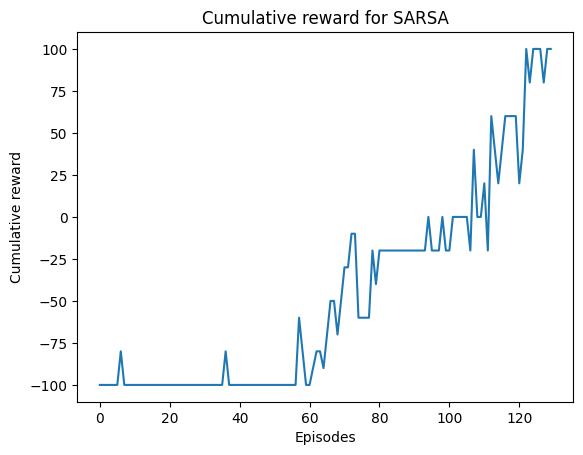

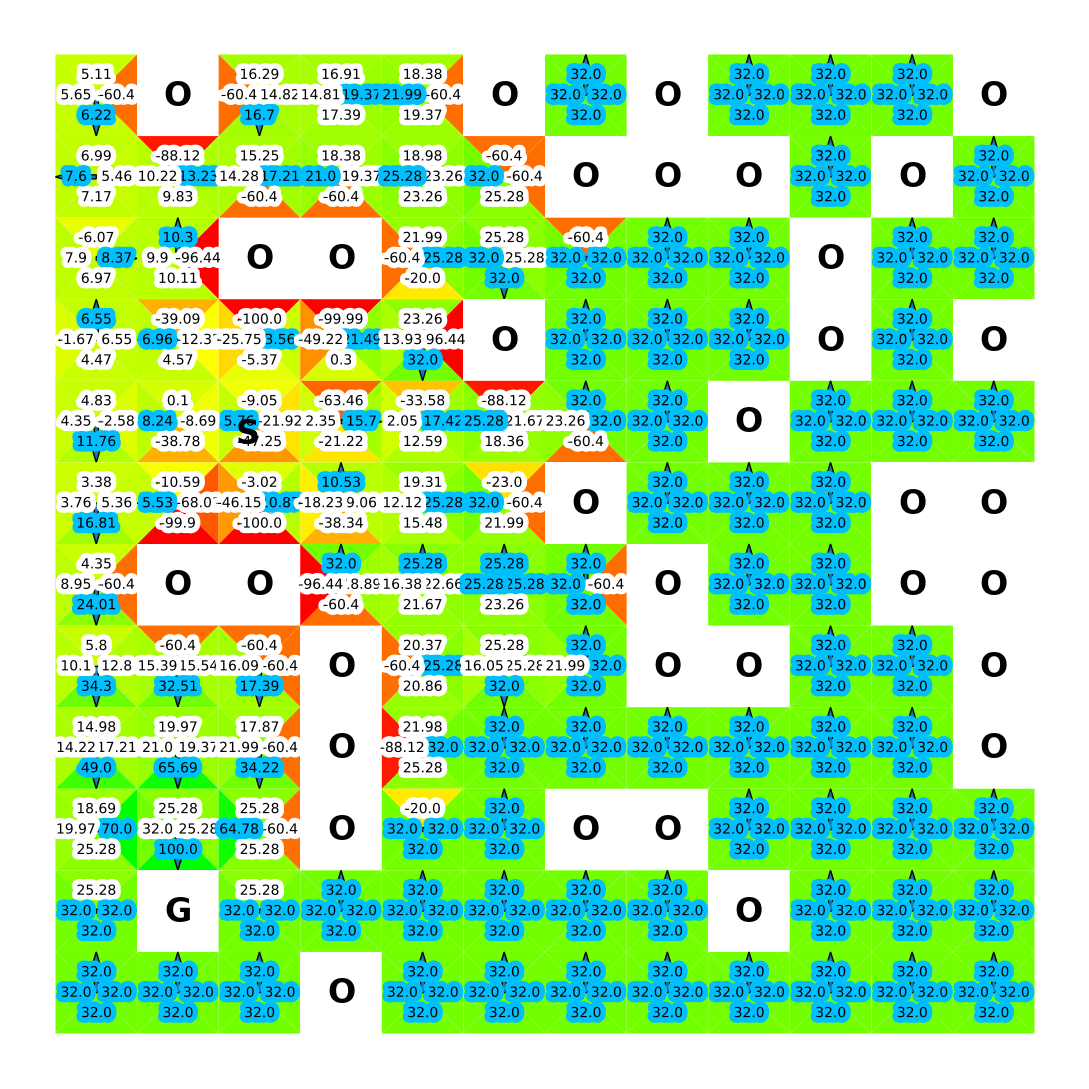

In [6]:
np.random.seed(8)
random.seed(8)

env = Random(size=12, water=0.3, mountain=0.0)

lst_Q_table = []
lst_policy = []
lst_reward = []
for i in range(MAX_RUNS):
    Q_table, policy, reward = sarsa(env, max_episodes=MAX_EPISODES, max_steps=MAX_STEPS, gamma=GAMMA, alpha=ALPHA, epsilon=EPSILON, initialisation=INITIALIZATION, decay_rate=DECAY_RATE, decay_interval=DECAY_INTERVAL)
    lst_Q_table.append(Q_table)
    lst_policy.append(policy)
    lst_reward.append(reward)

# Check if the goal state is reachable with the every policy
index = check_goal_reachable_all_policies(env, lst_policy, "SARSA")

# Plot the cummulative reward
plot_cummulative_reward(lst_reward, title="SARSA")

# Example Q-table plot
plot_q_table(env, lst_Q_table[index], lst_policy[index])

# Q-Learning

In [11]:
# optimize hyperparameters of sarsa function:
def objective(trial):
    np.random.seed(8)
    random.seed(8)

    env = Random(size=12, water=0.3, mountain=0.0)

    # hyperparameters to optimize
    max_steps = 1000    # We want to optimize the max_episodes, not the max_steps
    epsilon = 0.8       # Due to the fact that we are using a decaying epsilon, we do not optimize this hyperparameter

    max_episodes = trial.suggest_int("max_episodes", 100, 1000)
    gamma = trial.suggest_float("gamma", 0.1, 0.9, step=0.1)
    alpha = trial.suggest_float("alpha", 0.1, 0.9, step=0.1)
    initialization = trial.suggest_int("initialization", 0, 100)
    decay_rate = trial.suggest_float("decay_rate", 0.25, 3, step=0.25)
    decay_interval = trial.suggest_int("decay_interval", 1, 100, step=10)

    # run sarsa function with hyperparameters
    Q, policy, cummulative_rewards = qLearning(env, max_episodes, max_steps, gamma, alpha, epsilon, initialization, decay_rate=DECAY_RATE, decay_interval=DECAY_INTERVAL)

    return cummulative_rewards[-1]

# optimize hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10000)


[I 2023-11-14 17:07:42,525] A new study created in memory with name: no-name-663bb24c-1620-494e-a1c2-519f06ae26fa
/Users/andrekestler/opt/anaconda3/envs/AI/lib/python3.10/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [1, 100] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 91].
  warnings.warn(
[I 2023-11-14 17:07:42,664] Trial 0 finished with value: 100.0 and parameters: {'max_episodes': 584, 'gamma': 0.4, 'alpha': 0.4, 'initialization': 82, 'decay_rate': 1.0, 'decay_interval': 21}. Best is trial 0 with value: 100.0.
[I 2023-11-14 17:07:42,758] Trial 1 finished with value: 100.0 and parameters: {'max_episodes': 275, 'gamma': 0.1, 'alpha': 0.30000000000000004, 'initialization': 66, 'decay_rate': 1.5, 'decay_interval': 41}. Best is trial 0 with value: 100.0.
[I 2023-11-14 17:07:42,803] Trial 2 finished with value: 100.0 and parameters: {'max_episodes': 329, 'gamma': 0.6, 'alpha': 0.8, 'initialization': 93, 'dec

### Best parameter from Optuna

There was a problem with it because with this parameter the agent never reached the goal state so I tried the second best

In [22]:
# Print best parameter with lowest max_episodes
df = study.trials_dataframe()
df = df[df["value"] == 100]
best_param = df[df["params_max_episodes"] == df["params_max_episodes"].min()]
best_param

number  value             datetime_start          datetime_complete  \
6410    6410  100.0 2023-11-14 17:50:32.310118 2023-11-14 17:50:32.884093   

                   duration  params_alpha  params_decay_interval  \
6410 0 days 00:00:00.573975           0.5                     11   

      params_decay_rate  params_gamma  params_initialization  \
6410               1.25           0.3                     76   

      params_max_episodes     state  
6410                  100  COMPLETE

In [53]:
# Due that params_max_epochs==100 leads to a result with no goal state, I choose the second best parameter
df.sort_values(by="params_max_episodes", ascending=True).head(15)


number  value             datetime_start          datetime_complete  \
6410    6410  100.0 2023-11-14 17:50:32.310118 2023-11-14 17:50:32.884093   
1993    1993  100.0 2023-11-14 17:14:44.279498 2023-11-14 17:14:44.509210   
3654    3654  100.0 2023-11-14 17:25:04.810109 2023-11-14 17:25:05.211483   
137      137  100.0 2023-11-14 17:08:03.967505 2023-11-14 17:08:04.031823   
9389    9389  100.0 2023-11-14 18:28:54.630995 2023-11-14 18:28:55.515138   
542      542  100.0 2023-11-14 17:09:02.286602 2023-11-14 17:09:02.378211   
5817    5817  100.0 2023-11-14 17:43:52.062252 2023-11-14 17:43:52.601598   
976      976  100.0 2023-11-14 17:10:16.447881 2023-11-14 17:10:16.572126   
9862    9862  100.0 2023-11-14 18:36:11.022069 2023-11-14 18:36:11.881294   
8617    8617  100.0 2023-11-14 18:17:39.282437 2023-11-14 18:17:40.040936   
5336    5336  100.0 2023-11-14 17:38:57.477640 2023-11-14 17:38:58.015935   
7158    7158  100.0 2023-11-14 17:58:59.081573 2023-11-14 17:58:59.718096   
209      209  100.0 2023-11-14 17:08:16.991758 2023-11-14 17:08:17.060542   
6348    6348  100.0 2023-11-14 17:49:51.042631 2023-11-14 17:49:51.680319   
9088    9088  100.0 2023-11-14 18:24:19.043216 2023-11-14 18:24:19.849107   

                   duration  params_alpha  params_decay_interval  \
6410 0 days 00:00:00.573975           0.5                     11   
1993 0 days 00:00:00.229712           0.5                     41   
3654 0 days 00:00:00.401374           0.6                     11   
137  0 days 00:00:00.064318           0.5                     41   
9389 0 days 00:00:00.884143           0.4                     31   
542  0 days 00:00:00.091609           0.6                      1   
5817 0 days 00:00:00.539346           0.7                     41   
976  0 days 00:00:00.124245           0.7                     41   
9862 0 days 00:00:00.859225           0.4                     51   
8617 0 days 00:00:00.758499           0.4                      1   
5336 0 days 00:00:00.538295           0.3                     31   
7158 0 days 00:00:00.636523           0.5                     81   
209  0 days 00:00:00.068784           0.7                     41   
6348 0 days 00:00:00.637688           0.9                     41   
9088 0 days 00:00:00.805891           0.7                     41   

      params_decay_rate  params_gamma  params_initialization  \
6410               1.25           0.3                     76   
1993               2.00           0.6                     16   
3654               1.25           0.3                     69   
137                0.75           0.8                     70   
9389               1.00           0.3                     25   
542                0.75           0.4                     29   
5817               0.25           0.5                     79   
976                2.00           0.2                     92   
9862               1.25           0.7                     49   
8617               1.75           0.7                     95   
5336               0.25           0.1                     79   
7158               1.25           0.8                     57   
209                0.75           0.8                     21   
6348               2.00           0.2                     56   
9088               1.50           0.7                     46   

      params_max_episodes     state  
6410                  100  COMPLETE  
1993                  103  COMPLETE  
3654                  104  COMPLETE  
137                   116  COMPLETE  
9389                  117  COMPLETE  
542                   122  COMPLETE  
5817                  126  COMPLETE  
976                   129  COMPLETE  
9862                  131  COMPLETE  
8617                  134  COMPLETE  
5336                  135  COMPLETE  
7158                  135  COMPLETE  
209                   136  COMPLETE  
6348                  137  COMPLETE  
9088                  138  COMPLETE

### Second best parameter from Optuna

In [64]:
# second best parameter where at least one run reaches the goal state
best_param = df[df["params_max_episodes"] == 103]
best_param
# MAX_EPISODES = 103
# MAX_STEPS = 1000
# GAMMA = 0.6
# ALPHA = 0.5
# EPSILON = 0.8
# INITIALIZATION = 16
# DECAY_RATE = 2.0
# DECAY_INTERVAL= 41

number  value             datetime_start          datetime_complete  \
1993    1993  100.0 2023-11-14 17:14:44.279498 2023-11-14 17:14:44.509210   

                   duration  params_alpha  params_decay_interval  \
1993 0 days 00:00:00.229712           0.5                     41   

      params_decay_rate  params_gamma  params_initialization  \
1993                2.0           0.6                     16   

      params_max_episodes     state  
1993                  103  COMPLETE

In [65]:
# Get best parameter (second best from Optuna due to the fact that params_max_epochs==100 leads to a result with no goal state)
MAX_STEPS = 1000
EPSILON = 0.8

MAX_EPISODES = best_param["params_max_episodes"].values[0]
GAMMA = best_param["params_gamma"].values[0]
ALPHA = best_param["params_alpha"].values[0]
INITIALIZATION = best_param["params_initialization"].values[0]
DECAY_RATE = best_param["params_decay_rate"].values[0]
DECAY_INTERVAL = best_param["params_decay_interval"].values[0]

print("MAX_EPISODES: ", MAX_EPISODES)
print("MAX_STEPS: ", MAX_STEPS)
print("GAMMA: ", GAMMA)
print("ALPHA: ", ALPHA)
print("EPSILON: ", EPSILON)
print("INITIALIZATION: ", INITIALIZATION)
print("DECAY_RATE: ", DECAY_RATE)
print("DECAY_INTERVAL: ", DECAY_INTERVAL)


MAX_EPISODES:  103
MAX_STEPS:  1000
GAMMA:  0.6
ALPHA:  0.5
EPSILON:  0.8
INITIALIZATION:  16
DECAY_RATE:  2.0
DECAY_INTERVAL:  41


### Best Parameter after tweaking it manually after Optuna optimization
I did the manual tweak that every run reaches the goal state  
I just increased MAX_EPISODES from 103 to a high value (500) and I saw i the plot that it converged aroudn 120 episodes so I took MAX_EPISODES=120  
<br>
MAX_EPISODES = 120  
MAX_STEPS = 1000  
GAMMA = 0.6  
ALPHA = 0.5  
EPSILON = 0.8  
INITIALIZATION = 16  
DECAY_RATE = 2.0  
DECAY_INTERVAL= 41  

In [7]:
# Best parameter after tweaking the hyperparameters manually after Optuna that every run leads to a goal state
MAX_EPISODES = 120
MAX_STEPS = 1000
GAMMA = 0.6
ALPHA = 0.5
EPSILON = 0.8
INITIALIZATION = 16
DECAY_RATE = 2.0
DECAY_INTERVAL= 41

### Run Environment with parameters 10 times

Q-Learning: Goal state is reachable with [0, 1, 2, 3, 6, 7, 8, 9] policies



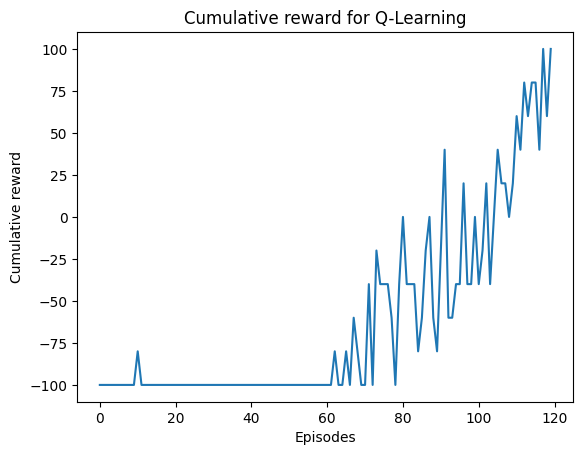

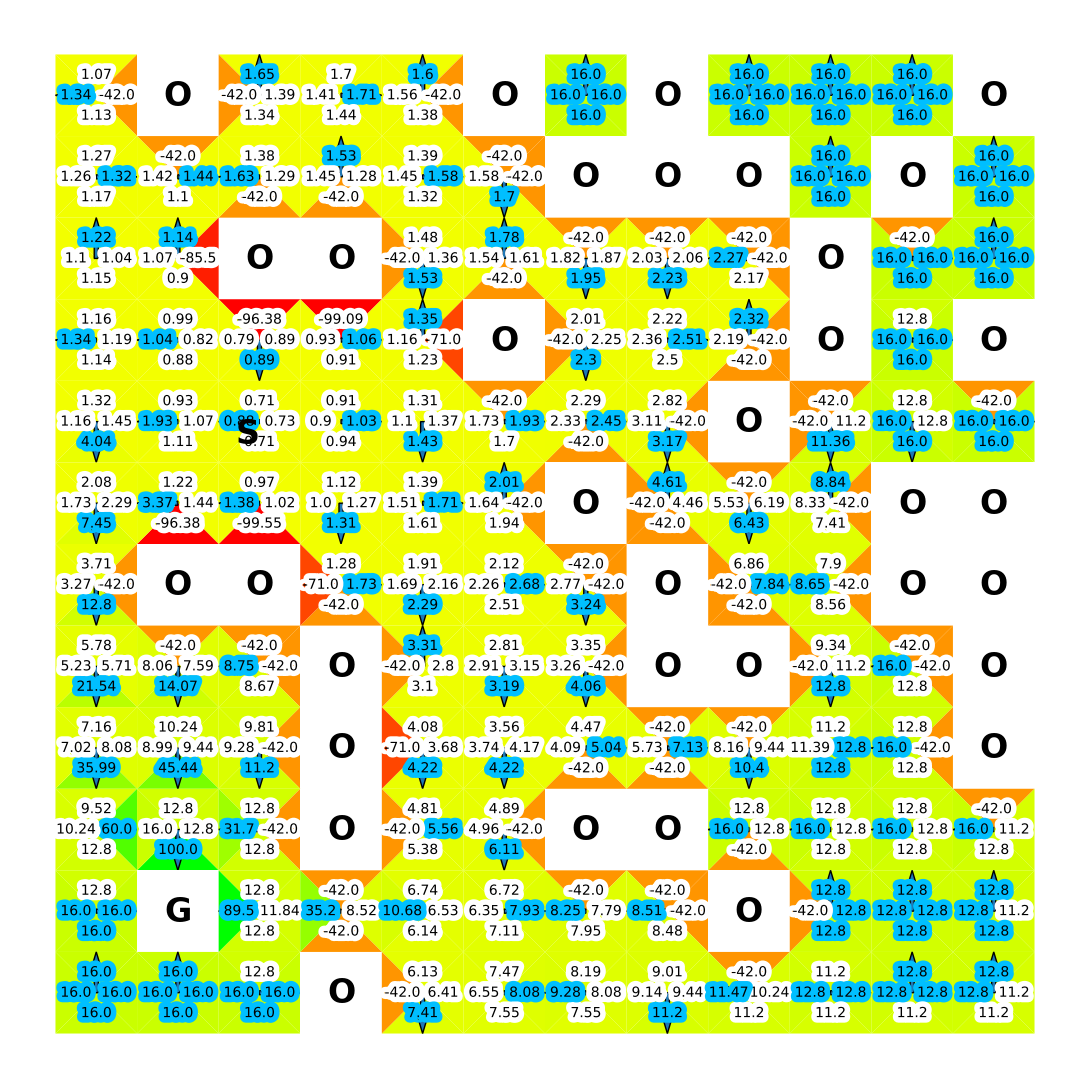

In [8]:
np.random.seed(8)
random.seed(8)

env = Random(size=12, water=0.3, mountain=0.0)

lst_Q_table = []
lst_policy = []
lst_reward = []
for i in range(MAX_RUNS):
    Q_table, policy, reward = qLearning(env, max_episodes=MAX_EPISODES, max_steps=MAX_STEPS, gamma=GAMMA, alpha=ALPHA, epsilon=EPSILON, initialisation=INITIALIZATION, decay_rate=DECAY_RATE, decay_interval=DECAY_INTERVAL)
    lst_Q_table.append(Q_table)
    lst_policy.append(policy)
    lst_reward.append(reward)

# Check if the goal state is reachable with the every policy
index = check_goal_reachable_all_policies(env, lst_policy, "Q-Learning")

# Plot the cummulative reward
plot_cummulative_reward(lst_reward, title="Q-Learning")

# Example Q-table plot
plot_q_table(env, lst_Q_table[index], lst_policy[index])